In [ ]:
%pip install pandas

a = 2.2311
b = 4.4621
RMSE: 537.093669502492


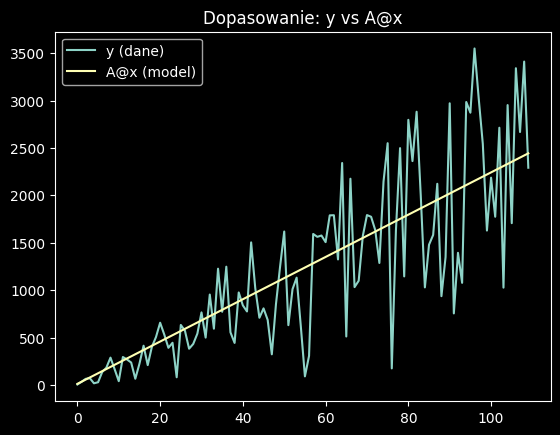

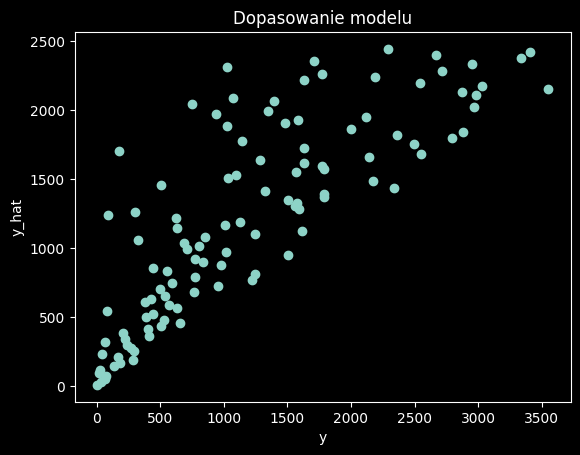

Wartości singular: [2.97878331e+03 1.93368602e-13]
rank(A): 1
cond(A): 1.5404689697160676e+16


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/lab3_10.csv" , sep=';')
df['y'] = df['y'].astype(str).str.replace(',', '.', regex=False).astype(float)

df.head()

A = df[['x1','x2']].to_numpy(dtype=float)
y = df['y'].to_numpy(dtype=float).reshape(-1, 1)

x = np.linalg.pinv(A) @ y
a, b = x.ravel()
print(f"a = {a:.4f}")
print(f"b = {b:.4f}")

y_hat = A @ x

rmse = np.sqrt(np.mean((y_hat - y)**2))
print("RMSE:", rmse)

plt.figure()
plt.plot(y, label="y (dane)")
plt.plot(y_hat, label="A@x (model)")
plt.legend()
plt.title("Dopasowanie: y vs A@x")
plt.show()

plt.figure()
plt.scatter(y, y_hat)
plt.xlabel("y")
plt.ylabel("y_hat")
plt.title("Dopasowanie modelu")
plt.show()

U, S, VT = np.linalg.svd(A, full_matrices=False)
print("Wartości singular:", S)
print("rank(A):", np.linalg.matrix_rank(A))
print("cond(A):", np.linalg.cond(A))

